# Modelos de Regresión Lineal

<img src="img/tec_min_cuadraticos_1.jpg" width="700">

<img src="img/tec_min_cuadraticos_2.jpg" width="700">

<img src="img/p-valor.jpg" width="700">

<img src="img/estadisticoF.jpg" width="700">

<img src="img/rse.jpg" width="700">

## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)= Normal(media, desviacion standard)
* Ye = 5 + 1.4 * x + e (alpha=5, beta=1.4)
* e(el residuo) estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.4 * x #lo que nos devolvería el modelo lineal

In [5]:
y_act = 5 + 1.4 * x + res #lo que realmente observamos

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,0.222935,5.200183,5.312109
1,-0.290709,5.380977,4.593007
2,-1.256170,3.073069,3.241362
3,0.393100,4.749825,5.550341
4,-1.188365,4.040969,3.336289


In [9]:
import matplotlib.pyplot as plt

In [16]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)] #calculamos el promedio de las y(da un valor) y lo metemos en una recta(recta verde de abajo)

Text(0.5, 1.0, 'Valor Actual vs Predicción')

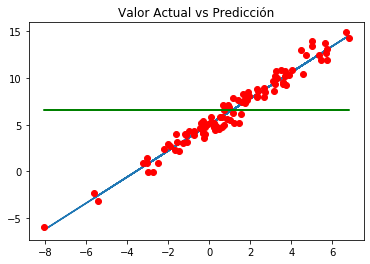

In [11]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"]) #la recta azul de la gráfica
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
<img src="img/errores_lineal.jpg" width="500">

* **SST** = SSD + SSR. 
* **SST** : *Suma de los cuadrados totales*: Distancia respecto al promedio. Es la distancia entre los puntos rojos y la recta verde(el promedio).
* **SSD** : *Suma de los cuadrados de las diferencias*. Es la diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal). Distancia entre los puntos rojos(datos obtenidos) y la recta azul(el modelo)
* **SSR** : *Suma de los cuadrados de la regresión*: Diferencia entre la recta de regresión y la recta promedio que el modelo busca explicar. Distancia entre la recta verde y la azúl en un punto rojo dado.
* **$R^2$** = SSR / SST, coeficiente de determinación entre 0 y 1. 

Lo que nos interesa es: **SSD** sea pequeña (menos distancia habrá entre nuestros valores y el modelo) y que **SSR** se acerque lo máximo posible a **SST**, por ello se define **$R^2$** y cuanto más cerca esté de 1 mejor será el modelo.

In [14]:
y_m = np.mean(y_act)
print(y_m)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

6.621223568937693


In [64]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.116134,5.210088,6.562588,0.106192,1.829257,2.816930
1,4.546110,11.695694,11.364554,20.035419,0.109654,23.109503
2,2.570031,8.374421,8.598044,2.922678,0.050007,2.208082
3,3.115772,9.849034,9.362081,6.118803,0.237123,8.765000
4,2.312483,7.275953,8.237476,1.819845,0.924525,0.150152


In [65]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [66]:
SSR

1176.251867797333

In [67]:
SSD

57.694203369337785

In [68]:
SST

1247.3962921465704

In [69]:
SSR+SSD

1233.946071166671

In [70]:
R2 = SSR/SST

In [71]:
R2

0.9429656599132509

(array([ 6.,  7., 14., 12., 15., 18., 14.,  9.,  4.,  1.]),
 array([-1.68189221, -1.33678854, -0.99168487, -0.6465812 , -0.30147753,
         0.04362614,  0.38872981,  0.73383348,  1.07893715,  1.42404082,
         1.76914449]),
 <a list of 10 Patch objects>)

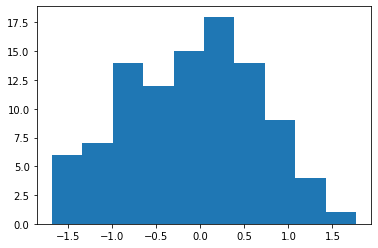

In [72]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [73]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.2698632781103154, 6.8884593546226)

In [74]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean) #numerador de la beta
data["beta_d"] = (data["x"]-x_mean)**2 #denominador de la beta

In [75]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [76]:
alpha = y_mean - beta * x_mean

In [77]:
alpha, beta

(5.098623271982984, 1.4094714868068894)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

Ahora veremos si el modelo funciona bien:

In [78]:
data["y_model"] = alpha + beta * data["x"]

In [79]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.116134,5.210088,6.562588,0.106192,1.829257,2.816930,0.258014,0.023633,6.671783
1,4.546110,11.695694,11.364554,20.035419,0.109654,23.109503,15.749684,10.733790,11.506235
2,2.570031,8.374421,8.598044,2.922678,0.050007,2.208082,1.932000,1.690436,8.721009
3,3.115772,9.849034,9.362081,6.118803,0.237123,8.765000,5.464950,3.407379,9.490215
4,2.312483,7.275953,8.237476,1.819845,0.924525,0.150152,0.404009,1.087055,8.358002


In [80]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [81]:
SSR, SSD, SST

(1190.980228889213, 56.41606325735755, 1247.3962921465704)

In [82]:
R2 = SSR / SST
R2

0.9547729429592304

Text(0.5, 1.0, 'Valor Actual vs Predicción')

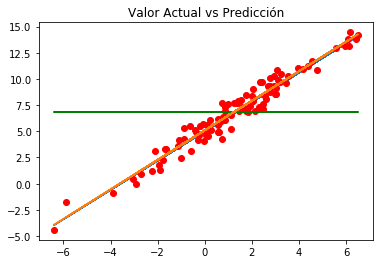

In [83]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [84]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7587319123847338

In [85]:
np.mean(data["y_actual"])

6.8884593546226

In [86]:
RSE / np.mean(data["y_actual"])

0.11014537116715015